# 数据的前n的主成分

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X3 = np.empty((100, 2))
X3[:, 0] = np.random.uniform(0., 100., size=100)
X3[:, 1] = 0.75 * X3[:, 0] + 3. + np.random.normal(size=100)
def demean(X):
    # 均值归零
    # 每一列的均值（每个特征的均值）
    return X - np.mean(X, axis=0)

X3_demean = demean(X3)

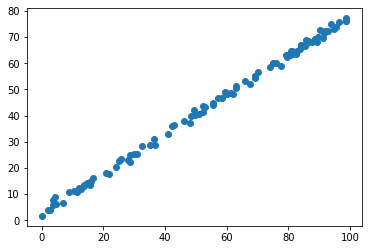

In [26]:
plt.scatter(X3[:,0], X3[:, 1])
# plt.plot([0, w[0] * 30], [0, w[1] * 30], color='red')
plt.show()

In [27]:
def f(w, X_demean):
    return np.sum((X_demean.dot(w)) ** 2) / len(X_demean)
def df(w, X_demean):
    return X_demean.T.dot(X_demean.dot(w)) * 2 / len(X_demean)
def direction(w):
    return w / np.linalg.norm(w)
def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    # w是一个方向向量，在推倒时假设w是单位方向向量，所以除以模
    w = direction(initial_w)
    i_iter = 0
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = direction(w + eta * gradient)   # 注意1：每次求一个单位方向
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        i_iter += 1
    return w

In [28]:
initial_w = np.random.random(size=X3.shape[1])  # 注意2： 不能从0开始。因为要求最大值
initial_w
eta = 0.001
w = first_component(X3_demean, initial_w, eta)
w

array([0.7999008 , 0.60013225])

In [29]:
# X4 = np.empty(X3_demean.shape)
# for i in range(len(X3)):
#     X4[i] = X3[i] - X3[i].dot(w) * w
X4 = X3 - X3.dot(w).reshape(-1, 1) * w   # !!!!!!!!!!!!!向量化
X4_demean = demean(X4)

In [30]:
w2 = first_component(X4_demean, initial_w, eta)
w2

array([ 0.60219696, -0.79834756])

In [31]:
w.dot(w2)

0.0025837192988874547

In [36]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
    return res

In [37]:
all_components = first_n_components(2, X3)

[array([0.79990064, 0.60013245]), array([ 0.60078228, -0.79941269])]